# **Hypothesis Testing**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t, norm

In [2]:
def t_score(sample_mean, pop_mean, sample_std, sample_size):
  numerator = sample_mean - pop_mean
  denominator = sample_std / ((sample_size-1)**0.5)
  return numerator/denominator

## **Understanding Hypothesis Testing**

Step 1:  
Alternate Hypothesis (Bold claim): $H_1 \Rightarrow\,>,\,<,\,\neq$
Null Hypothesis (Status Quo): $H_0 \Rightarrow\,\leq,\,\geq,\,=$
Step 2:  
* Collect a sample of size n  
* Compute the mean from the sample $\bar{x}$
Step 3:  
* If population variance is known
$$ z = \frac{\bar{x}-\mu}{\sigma/\sqrt[2]{n}}$$
* If population variance is unknown
$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}}$$
Step 4:  
Decide significance level $\alpha$. Lower $\alpha$ means you need stronger evidence to reject Null Hypothesis. 
Step 5.1:  
Apply decision rule:
* If test statistic is z-score:  
  * Two failed z-test:
$$|z| > z_\frac{\alpha}{2}\, \Rightarrow\, Accept\, H_1\, or\, Reject\, H_0$$
  * Right tailed z-test:
$$z > z_\alpha \Rightarrow\, Accept\, H_1\, or\, Reject\, H_0$$
  * Left tailed z-test:
$$z < -z\alpha \Rightarrow\, Accept\, H_1\, or\, Reject\, H_0$$
* If test statistic is t-score:
  * Two tailed t-test:
$$|t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow\, Accept\, H_1\, or\, Reject\, H_0$$
  * Right tailed t-test:
$$t > t_{n-1, \alpha} \Rightarrow\, Accept\, H_1\, or\, Reject\, H_0$$
* Left tailed t-test:
$$t < t_{n-1,\alpha} \Rightarrow\, Accept\, H_1\, or\, Reject\, H_0$$
 **Note:**  
* If the Alternate hypothesis has $\neq$ we make use of the **Two tailed test**.
* If the Alternate Hypothesi has > sign we make use of the **Right tailed test**.
* If the Alternate Hypothesis has < sign we make use of the **Left tailed test**.
Step 5.2:  
Compute p-value $P(Test Statistics|H_0)$
* For two tailed test:
$$p\, vlaue = 2*(1.0-cdf(test\, statistic))$$
* For one tailed test:
$$p\, value = (1.0-cdf(test\, statistic))$$
   Now,
$$if(p\, value<\alpha) \Rightarrow\, Accept\, H_1\, or\, Reject\, H_0$$

## **Unknown Variance of Population**
**Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim? ~(Given that the population std is 50)~**

Step 1:  
Alternate Hypothesis (Bold Claim):
$$H_1:\,\, \mu \neq 500$$
Null Hypothesis (Status Quo):
$$H_0:\,\, \mu = 500$$
Step 2:
* Collect a sample of size n = 10
$$[490,\, 220,\, 470,\, 500,\, 495,\, 496,\, 496,\, 498,\, 508,\, 480]$$


In [3]:
sample = [490, 220, 470, 500, 495, 496,496, 498, 508,480]

sample_mean = sum(sample)/len(sample)
sample_std = np.std(sample)
print(sample_mean)
print(sample_std)

465.3
82.3918078451978


In [4]:
pop_mean = 500
sample_size = len(sample)

Step 2:
* Compute sample mean
$$\bar{x}=465.3$$
  
Step 3:  
Compute Test Statistic:  
**Note**: Since we have not been provided with the standard deviation for the entire population we will be making use of the t-score.  
$$t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}}$$


In [5]:
#Calculating the t-score
tScore = t_score(sample_mean, pop_mean, sample_std, sample_size)

print(tScore)

-1.2634751284446712


Step 4:  
Decide $\alpha$ or significance level

In [6]:
confidence_level = 0.95

alpha = 1 - confidence_level

Step 5.1:  
Two tailed t-test is being used here since the $\neq$ sign is present in the Alternate hupothesis.
$$ |t| > t_{n-1, \frac{\alpha}{2}} \Rightarrow\, Accept\, H_1\, or\, Reject\, H_0$$

In [7]:
t_critical = t.ppf(1-(alpha/2), df = 9)

print(t_critical)

2.2621571627409915


Text(465.3, 0.0007, 'x_bar')

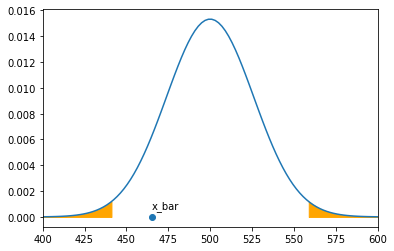

In [8]:
#Plotting the sampling distribution with rejection regions

#Defining the x minimum and the x maximum
x_min = 400
x_max = 600

#Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / (sample_size**0.5)

#Plotting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

#Computing the left and right critical values (Two tailed test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

#Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

#Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')

#Plotting the sample mean and concluding the results
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))

#In this case the sample mean does not fall in the rejection region 
#i.e. here we Fail to reject the Null Hypothesis

In [9]:
#Conclusion using t-test

if (abs(tScore) > t_critical):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


Step 5.2:  
Compute p-value

In [10]:
#Conclusion using p test

p_value = 2 * (1.0 - norm.cdf(np.abs(tScore)))

print("p_value = ", p_value)

if (p_value < alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

p_value =  0.20641847943818137
Fail to reject Null Hypothesis


**Q-2: You have developed a new Natural Language Processing Algorithm and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client? ~(Given that the population std is 0.5)~**

Step 1:  
Alternate Hypothesis (Bold Claim):
$$H_1:\, \mu > 4$$
Null Hypothesis (Status Quo):
$$H_0:\, \mu \leq4$$

Step 2:  
* Collect a sample of size n = 20
$$[4,\, 3,\, 5,\, 4,\, 5,\, 3,\, 5,\, 5,\, 4,\, 2,\, 4,\, 5,\, 5,\, 4,\, 4,\, 5,\, 4,\, 5,\, 4,\, 5]$$
* Compute sample mean 
$$\bar{x} = 4.25$$

In [11]:
sample_1 = [4, 3, 5, 4, 5, 3, 5, 5, 4, 2, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5]

sample_mean_1 = sum(sample_1)/len(sample_1)
pop_mean = 4
sample_std_1= np.std(sample_1)
sample_size_1 = len(sample_1)
print(sample_mean_1)
print(sample_std_1)

4.25
0.82915619758885


Step 3:  
Comput Test Statistic:
$$ t = \frac{\bar{x}-\mu}{s/\sqrt[2]{n}}$$

In [12]:
tScore = t_score(sample_mean_1, pop_mean, sample_std_1, sample_size_1)

print(tScore)

1.3142574813455419


Step 4:  
Decide $\alpha$

In [13]:
confidence_level = 0.95

alpha = 1- confidence_level

Step 5.1:  
Right tailed t-test is being used since the > sign is present in the Alternate Hypothesis.  
$$t>t_{n-1, \alpha} \Rightarrow\, Accept\, H_1\, or\, Reject\, H_0$$

In [14]:
t_critical = t.ppf(1-(alpha), df = 19)

print(t_critical)

1.729132811521367


Text(4.25, 0.1, 'x_bar')

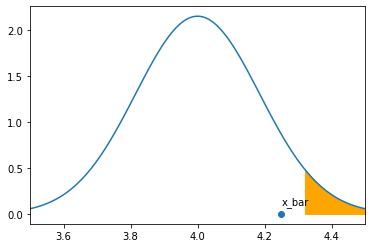

In [15]:
#Plotting the sampling distribution with rejection regions

#Defining the x minimum and the x maximum
x_min = 3.5
x_max = 4.5

#Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std_1 / (sample_size_1**0.5)

#Plotting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

#Computing the left and right critical values (Right tailed test)
t_critical_right = pop_mean + (t_critical * std)

#Shading the right rejection region
x1 = np.linspace(x_max, t_critical_right, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

#Plotting the sample mean and concluding the results
plt.scatter(sample_mean_1, 0)
plt.annotate("x_bar", (sample_mean_1, 0.1))

#In this case the sample mean does not fall in the rejection region 
#i.e. here we Fail to reject the Null Hypothesis

In [16]:
#Conclusion using t-test

if (tScore > t_critical):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


Step 5.2:  
Compute p-value

In [17]:
#Conclusion using p test

p_value = 1.0 - norm.cdf(abs(tScore))

print("p_value = ", p_value)

if (p_value < alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

p_value =  0.09437978527056279
Fail to reject Null Hypothesis


**Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre? ~(Given that the population std is 1)~**

Step 1:  
Alternate Hypothesis (Bold Claim):
$$H_1:\, \mu > 15 $$
Null Hypothesis (Status Quo):
$$H_0:\ \mu \leq 15 $$
Step 2:  
* Collect a sample of size n = 20 
$$[14.08,\, 14.13,\, 15.65,\, 13.78,\, 16.26,\, 14.97,\, 15.36,\, 15.81,\, 14.53,\, 16.79,\, 15.78,\, 16.98,\, 13.23,\, 15.43,\, 15.46,\, 13.88,\, 14.31,\, 14.41,\, 15.76,\, 15.38]$$
* Compute sample mean
$$\bar{x} = 15.1$$

In [18]:
sample_2 =  [14.08, 14.13, 15.65, 13.78, 16.26, 14.97, 15.36, 15.81, 14.53, 16.79, 15.78, 16.98, 13.23, 15.43, 15.46, 13.88, 14.31, 14.41, 15.76, 15.38] 

sample_mean_2 = sum(sample_2)/len(sample_2)
sample_std_2 = np.std(sample_2)
sample_size_2 = len(sample_2)
pop_mean = 15
print(sample_mean_2)
print(sample_std_2)

15.098999999999998
0.9994043225842081


Step 3:  
Comput Test Statistic:
$$ t = \frac{\bar{x}-\mu}{s/\sqrt[2]{n}}$$

In [19]:
tScore = t_score(sample_mean_2, pop_mean, sample_std_2, sample_size_2)

print(tScore)

0.4317882018907916


Step 4:  
Decide $\alpha$

In [20]:
confidence_level = 0.95

alpha = 1 - confidence_level

Step 5.1:  
Right tailed t-test is being used since the > sign is present in the Alternate Hypothesis.  
$$t>t_{n-1, \alpha} \Rightarrow\, Accept\, H_1\, or\, Reject\, H_0$$

In [21]:
t_critical = t.ppf(1-(alpha), df = 19)

print(t_critical)

1.729132811521367


Text(15.098999999999998, 0.1, 'x_bar')

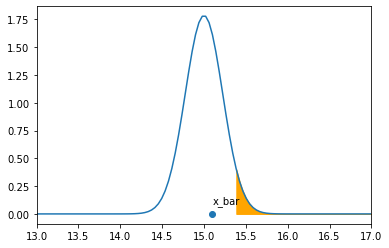

In [22]:
#Plotting the sampling distribution with rejection regions

#Defining the x minimum and the x maximum
x_min = 13
x_max = 17

#Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std_2 / (sample_size_2**0.5)

#Plotting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

#Computing the left and right critical values (Right tailed test)
t_critical_right = pop_mean + (t_critical * std)

#Shading the right rejection region
x1 = np.linspace(x_max, t_critical_right, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

#Plotting the sample mean and concluding the results
plt.scatter(sample_mean_2, 0)
plt.annotate("x_bar", (sample_mean_2, 0.1))

#In this case the sample mean does not fall in the rejection region 
#i.e. here we Fail to reject the Null Hypothesis

In [23]:
#Conclusion using t-test

if (tScore > t_critical):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


Step 5.2:  
Compute p-value 

In [24]:
#Conclusion using p test

p_value = 1.0 - norm.cdf(abs(tScore))

print("p_value = ", p_value)

if (p_value < alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

p_value =  0.3329476775823499
Fail to reject Null Hypothesis


**Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim? ~(Based on past data you know that the std is 10 ms)~**

Step 1:  
Alternate Hypothesis (Bold Claim):
$$H_1:\, \mu < 100$$
Null Hypothesis (Status Quo):
$$H_0:\, \mu \geq 100$$
Step 2:  
* Collect a sample of size n = 100
* Comput sample mean
$$\bar{x} = 97.5$$
Step 3:  
Compute Test Statistic:
$$t = \frac{\bar{x}-\mu}{s/\sqrt[2]{n}}$$

In [25]:
sample_size_3 = 100
sample_mean_3 = 97.5
pop_mean = 100
sample_std_3 = 8

In [26]:
tScore = t_score(sample_mean_3, pop_mean, sample_std_3,sample_size_3)

print(tScore)

-3.1093357409581874


Step 4:  
Decide $\alpha$

In [27]:
confidence_level = 0.99

alpha = 1 - confidence_level

Step 5.1:  
Left tailed t-test is being used since the > sign is present in the Alternate Hypothesis.  
$$t < t_{n-1, \alpha} \Rightarrow\, Accept\, H_1\, or\, Reject\, H_0$$

In [28]:
t_critical = t.ppf(1-(alpha), df = 19)

print(t_critical)

2.539483190622288


Text(465.3, 0.02, 'x_bar')

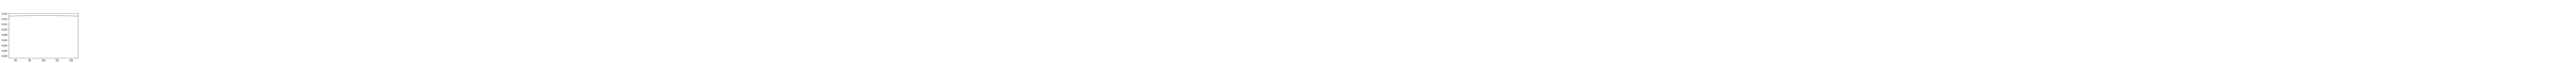

In [29]:
#Plotting the sampling distribution with rejection regions

#Defining the x minimum and the x maximum
x_min = 95
x_max = 105

#Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sample_std / (sample_size**0.5)

#Plotting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

#Computing the left and right critical values (Left tailed test)
t_critical_left = pop_mean + (-t_critical * std)

#Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

#Plotting the sample mean and concluding the results
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.02))

#In this case the sample mean fall in the rejection region 
#i.e. here we Reject the Null Hypothesis

In [30]:
#Conclusion using t-test

if (tScore < t_critical):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


Step 5.2:  
Comput p-value

In [31]:
#Conclusion using p test

p_value = 1.0 - norm.cdf(abs(tScore))

print("p_value = ", p_value)

if (p_value < alpha):
  print("Reject Null Hypothesis")
else:
  print("Fail to reject Null Hypothesis")

p_value =  0.0009375425642585977
Reject Null Hypothesis
